In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("loan_data.csv")

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())


In [7]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data = data.drop(columns = ["Loan_ID", "Gender"])

In [12]:
data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
376,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [13]:
data["Dependents"].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [14]:
data["Married"].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [16]:
data["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
data["Property_Area"].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [18]:
data["Loan_Status"].unique()

array(['N', 'Y'], dtype=object)

In [19]:
lb = LabelEncoder()

data["Married"] = lb.fit_transform(data["Married"])
data["Education"] = lb.fit_transform(data["Education"])
data["Self_Employed"] = lb.fit_transform(data["Self_Employed"])
data["Property_Area"] = lb.fit_transform(data["Property_Area"])
data["Loan_Status"] = lb.fit_transform(data["Loan_Status"])
data["Dependents"] = lb.fit_transform(data["Dependents"])

In [20]:
data["Dependents"].unique()

array([1, 0, 2, 3])

In [21]:
data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
376,1,3,0,0,5703,0.0,128.0,360.0,1.0,2,1
377,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
378,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
379,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1


<Axes: xlabel='Loan_Status', ylabel='count'>

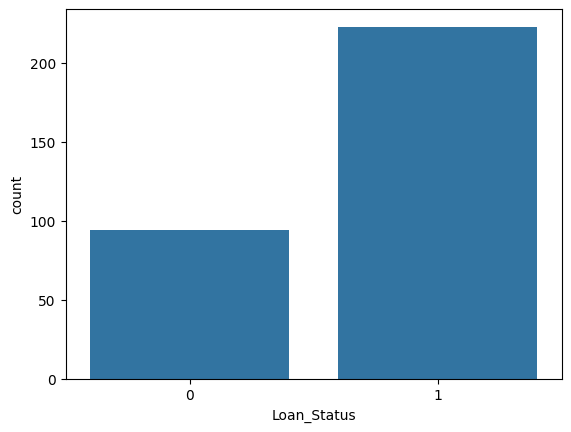

In [22]:
sns.countplot(x = "Loan_Status", data = data )

<Axes: >

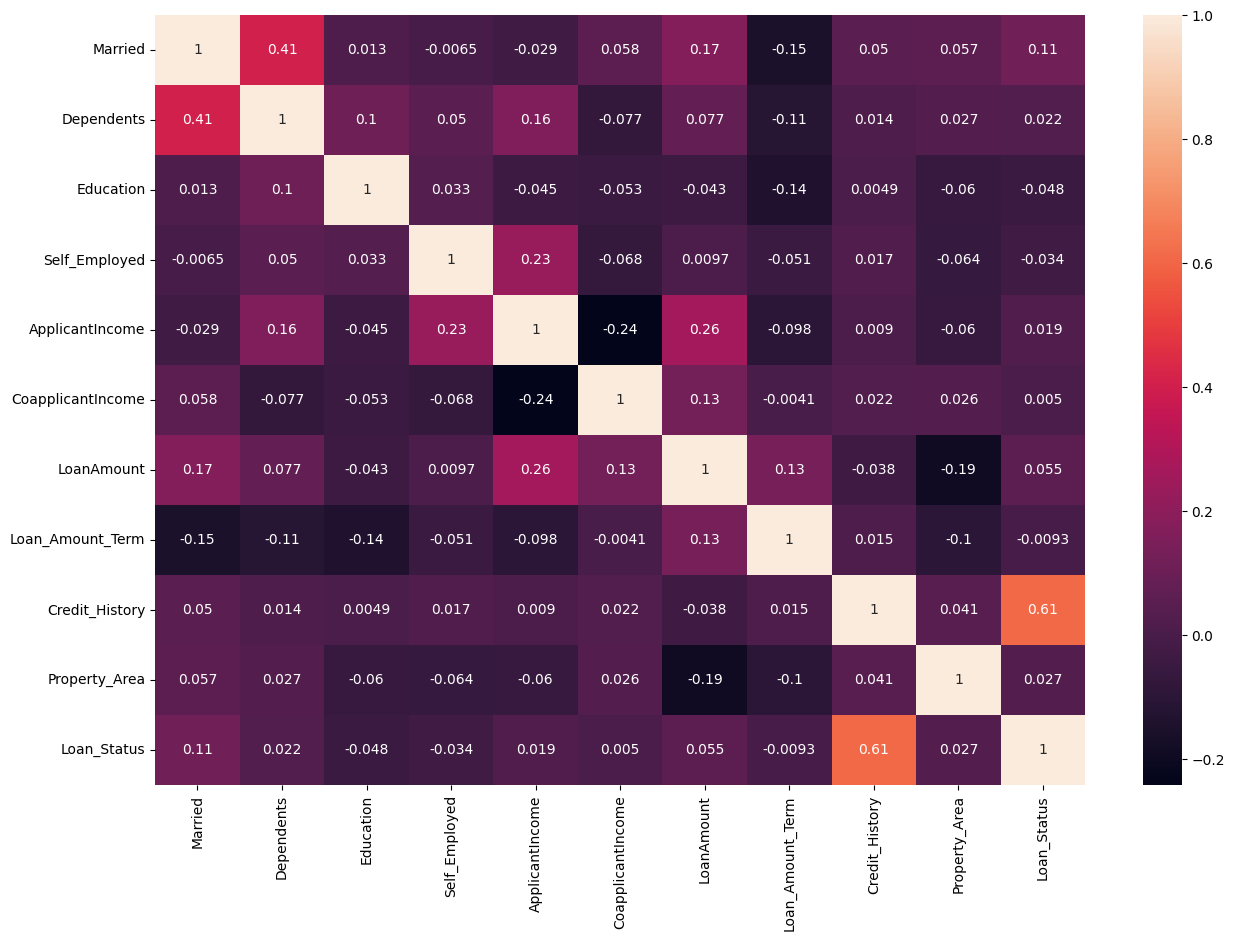

In [23]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot = True)

In [24]:
x = data.iloc[:, :-1]
y = data.iloc[:,-1]

## Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest,f_classif
select=SelectKBest(score_func=f_classif,k=5)
z=select.fit_transform(x,y)
flt=select.get_support()
s=x.columns
print(s[flt])

Index(['Married', 'Education', 'Self_Employed', 'LoanAmount',
       'Credit_History'],
      dtype='object')


## Feature Selection with Features Importance plots

Selected Features:
['Credit_History', 'Property_Area', 'Education', 'ApplicantIncome', 'Self_Employed']


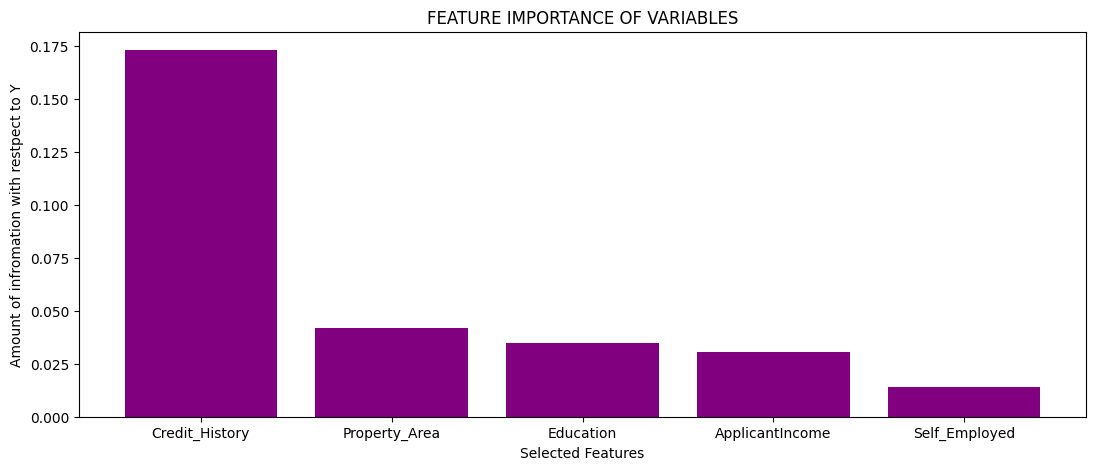

In [26]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif,f_classif

k = 5
selector = SelectKBest(score_func=mutual_info_classif, k=k)
x_selected = selector.fit_transform(x, y)
selected_indices = np.argsort(selector.scores_)[::-1][:k]
selected_features = list(x.columns[selected_indices])

# Print the selected features
print("Selected Features:")
print(selected_features)
plt.figure(figsize=(13,5))
plt.bar(selected_features,selector.scores_[selected_indices[range(k)]],color='purple')
#plt.plot(selected_features,selector.scores_[selected_indices[range(k)]],color='red')
plt.xlabel('Selected Features')
plt.ylabel('Amount of infromation with restpect to Y')
plt.title('FEATURE IMPORTANCE OF VARIABLES')
plt.show()

In [27]:
x = data[['Credit_History', 'ApplicantIncome', 'Property_Area', 'Dependents', 'Loan_Amount_Term']]

In [28]:
x

,Credit_History,ApplicantIncome,Property_Area,Dependents,Loan_Amount_Term
0,1.0,4583,0,1,360.0
1,1.0,3000,2,0,360.0
2,1.0,2583,2,0,360.0
3,1.0,6000,2,0,360.0
4,1.0,2333,2,0,360.0
...,...,...,...,...,...
376,1.0,5703,2,3,360.0
377,1.0,3232,0,0,360.0
378,1.0,2900,0,0,360.0
379,1.0,4106,0,3,180.0


In [29]:
sc=StandardScaler()
x = sc.fit_transform(x)

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [32]:
from sklearn.ensemble import RandomForestClassifier 

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        25
           1       0.82      0.86      0.84        42

    accuracy                           0.79        67
   macro avg       0.78      0.77      0.77        67
weighted avg       0.79      0.79      0.79        67



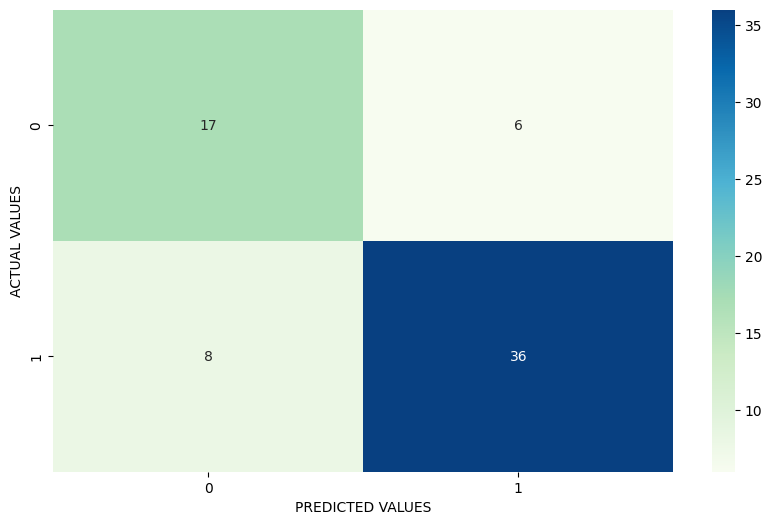

In [33]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, rf_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()